In [524]:
# KEYLIA CARTER 
# MINI PROJECT 2

In [525]:
# CELL 1 #

# IMPORTING MY PACKAGES #
from urllib import request
from pprint import pprint
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import requests

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [526]:
# CELL 2 #

# STORING DESIRED URL #
patriots = "https://www.espn.com/nfl/team/roster/_/name/ne/new-england-patriots"
type(patriots)

patriots

# ENSURING URL IS ACCESSABLE # 
response = request.urlopen(patriots)
response.code

# PARSING HTML DATA FROM URL #
html = response.read().decode("utf8")
html
htmlsoup = BeautifulSoup(html, 'html.parser')
type(htmlsoup)
htmlsoup.prettyify


patriots_head = htmlsoup.head
print(patriots_head)


# VIEWING THE CHILDREN LINKS FOUND ON MAIN URL PAGE # 
children = [child for child in patriots_head.children]
children[5]

for indx, children in enumerate(children[:20]):
    print('Child #:',indx, str(children)[:100],'...')

# USING THIS CLASS TO PARSE ALL THE PLAYER INFORMATION # 
# INDEXING AT THE 5TH LOCATION TO TEST # 
htmlsoup.find_all(class_="Table__TD")[5].text

# CREATING A LIST THAT HAS ALL THE ROW DATA FOR EACH PLAYER USING THE SPECIFIC CLASS TABLE__TD # 
table_data = [row.text for row in htmlsoup.find_all(class_="Table__TD")]
table_data

# CREATING AN EMPTY LIST THAT WILL STORE ALL THE PLAYERS DATA. USING A FOR LOOP THAT WILL LOOP THROUGH THE ENTIRE TABLE ABOVE 
# AND PULL OUT EVERY 8TH ELEMENT
players_data = []
for i in range(0, len(table_data), 8):
    player_data = table_data[i+1:i+8]
    players_data.append(player_data)
print(players_data)

# CREATING A PANDAS DATAFRAME WITH THE FOLLOIWNG 7 COLUMNS
df = pd.DataFrame(players_data, columns=['Name', 'Pos', 'Age', 'Ht', 'Wt', 'Exp', 'College'])

# Displaying the DataFrame
df

<head>
<meta charset="utf-8"/>
<!-- ESPNFITT | 6c21af2f9420 | 7152 | 10761dcf23bd7abbb43deaa10048e33f0e09e97f | Wed, 03 May 2023 21:25:59 GMT -->
<script async="" src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js" type="text/javascript"></script>
<script type="text/javascript">
        ;(function(){
            function gc(n){n=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return n?n[2]:null}function sc(n){document.cookie=n}function smpl(n){n/=100;return!!n&&Math.random()<=n}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(1)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;
            _nr && (function(){ window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true},privacy:{cookies_enabled:true},ajax:{deny_list:["bam-cell.nr-data.net"]}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e

,Name,Pos,Age,Ht,Wt,Exp,College
0,Malik Cunningham,QB,--,"6' 1""",190 lbs,R,Louisville
1,Mac Jones10,QB,24,"6' 3""",217 lbs,2,Alabama
2,Trace McSorley,QB,27,"6' 0""",202 lbs,4,Penn State
3,Bailey Zappe4,QB,24,"6' 1""",220 lbs,R,Western Kentucky
4,Kevin Harris36,RB,22,"5' 10""",225 lbs,R,South Carolina
...,...,...,...,...,...,...,...
83,Chad Ryland,PK,--,"6' 0""",183 lbs,R,Maryland
84,Bryce Baringer,P,--,"6' 3""",195 lbs,R,Michigan State
85,Corliss Waitman8,P,27,"6' 2""",210 lbs,1,Mississippi State
86,Tucker Addington46,LS,25,"6' 2""",230 lbs,R,Sam Houston State


In [527]:
# CELL 12 #

################## DATA CLEANING PATRIOTS DATA ################### 

#remove letters from strings in Weight column
df['Wt'] = df['Wt'].str.replace('\D', '', regex=True)
df
df['Ht'] = df['Ht'].apply(lambda x: x.replace("'", "").replace('"', ''))
df

# CONVERTING WT TO A INT TO RUN PROPER STATS
df["Wt"] = df["Wt"].astype(int)
df['Wt'].mean()

# replacing empty ages with the mean imputation of the column so theres no missing values #
df['Age']=df['Age'].replace('--', 27)
df

# removing characters from height column so i can then convert to numeric #
df['Ht'] = df['Ht'].str.replace(' ', '')
df['Ht'] = df['Ht'].astype('int')
df['Age'] = df['Age'].astype('int64')
df


# changing column names #
df = df.rename(columns={'Ht': 'Height', 'Wt': 'Weight'})
df

,Name,Pos,Age,Height,Weight,Exp,College
0,Malik Cunningham,QB,27,61,190,R,Louisville
1,Mac Jones10,QB,24,63,217,2,Alabama
2,Trace McSorley,QB,27,60,202,4,Penn State
3,Bailey Zappe4,QB,24,61,220,R,Western Kentucky
4,Kevin Harris36,RB,22,510,225,R,South Carolina
...,...,...,...,...,...,...,...
83,Chad Ryland,PK,27,60,183,R,Maryland
84,Bryce Baringer,P,27,63,195,R,Michigan State
85,Corliss Waitman8,P,27,62,210,1,Mississippi State
86,Tucker Addington46,LS,25,62,230,R,Sam Houston State


In [528]:
############### RUNNING ANALYSIS ON PATRIOTS ###############

df.describe()
# mean age is 26.55
# mean height is 6.3
# mean weight is 242.5 pounds 

# AVG age for each position on the patriots
agepos = df.groupby("Pos")["Age"].mean()

# the number of positions that come from each college for the patriots
collegepos = df.groupby("College")["Pos"].count()

# mean weight for each position
posweight = df.groupby("Pos")["Weight"].mean()

In [529]:
# table for the above groupings #
round(agepos,1)

Pos
C     25.7
CB    25.4
DE    27.0
DT    27.2
G     25.9
LB    25.5
LS    28.0
OT    29.6
P     27.0
PK    32.5
QB    25.5
RB    24.0
S     27.3
TE    27.2
WR    27.2
Name: Age, dtype: float64

In [530]:
collegepos

College
Alabama                     4
Arizona                     2
Arizona State               2
Arkansas                    2
Auburn                      1
Baylor                      1
Chattanooga                 1
Citadel                     1
Eastern Michigan            1
Eastern Washington          1
Florida                     1
Friends University          1
Georgia                     1
Georgia Tech                1
Grand Valley State          1
Hawai'i'                    1
Houston                     2
Illinois State              1
Iowa                        3
Jackson State               1
Kentucky                    2
LSU                         4
Lamar                       1
Lenoir-Rhyne                1
Liberty                     1
Louisiana-Lafayette         1
Louisville                  2
Maryland                    1
Michigan                    5
Michigan State              3
Mississippi State           1
Missouri                    2
Navy                        1
No

In [531]:
round(posweight, 2)

Pos
C     308.33
CB    188.91
DE    282.20
DT    308.20
G     317.50
LB    243.54
LS    237.50
OT    321.60
P     202.50
PK    202.50
QB    207.25
RB    212.80
S     210.43
TE    253.50
WR    200.50
Name: Weight, dtype: float64

[Text(0.5, 1.0, 'Patriots Age by Football Position')]

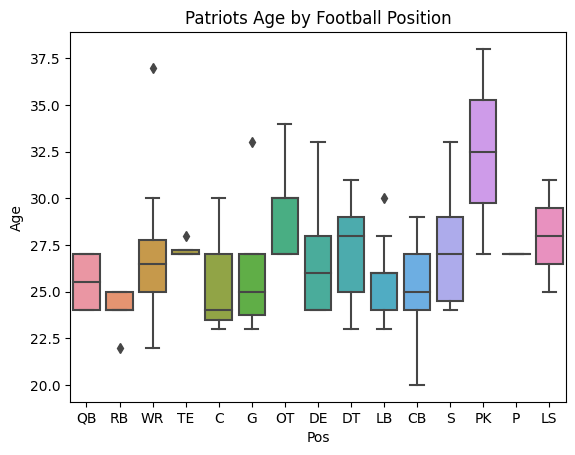

In [532]:
######### VISUALIZATIONS FOR PATRIOTS ##########

sns.boxplot(x = 'Pos', y = 'Age', data = df).set(title = "Patriots Age by Football Position")

[Text(0.5, 1.0, 'Patriots Weight by Football Position')]

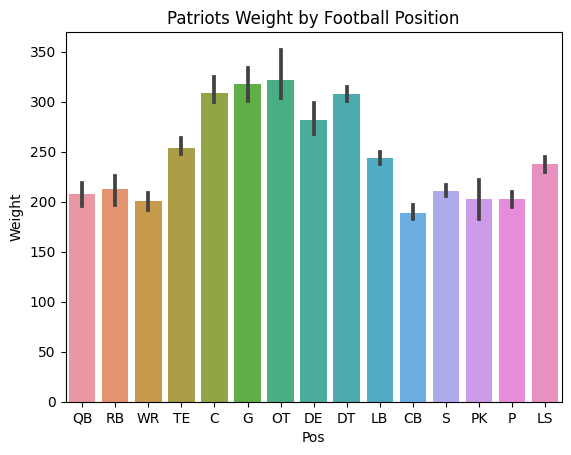

In [533]:
sns.barplot(x = 'Pos', y = 'Weight', data = df).set(title = "Patriots Weight by Football Position")

In [534]:
### WEB SCRAPING EAGLES ###

In [535]:
eagles = "https://www.espn.com/nfl/team/roster/_/name/phi/philadelphia-eagles"
response = request.urlopen(eagles)
response.code

html2 = response.read().decode("utf8")
html2
html2soup = BeautifulSoup(html2, 'html.parser')
type(html2soup)
html2soup.prettyify

eagles_head = html2soup.head
print(eagles_head)

children2 = [child for child in eagles_head.children]
children2[5]

for indx, children2 in enumerate(children2[:20]):
    print('Child #:',indx, str(children2)[:100],'...')


html2soup.find_all(class_="Table__TD")[5].text
table_data2 = [row.text for row in html2soup.find_all(class_="Table__TD")]
#table_data2



<head>
<meta charset="utf-8"/>
<!-- ESPNFITT | b5f73161e1ca | 7152 | 10761dcf23bd7abbb43deaa10048e33f0e09e97f | Wed, 03 May 2023 21:26:02 GMT -->
<script async="" src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js" type="text/javascript"></script>
<script type="text/javascript">
        ;(function(){
            function gc(n){n=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return n?n[2]:null}function sc(n){document.cookie=n}function smpl(n){n/=100;return!!n&&Math.random()<=n}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(1)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;
            _nr && (function(){ window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true},privacy:{cookies_enabled:true},ajax:{deny_list:["bam-cell.nr-data.net"]}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e

In [536]:
players_data2 = []
for i in range(0, len(table_data2), 8):
    player_data2 = table_data2[i+1:i+8]
    players_data2.append(player_data2)
#print(players_data2)

eagles_df = pd.DataFrame(players_data2, columns=['Name', 'Pos', 'Age', 'Ht', 'Wt', 'Exp', 'College'])

# Displaying the DataFrame
eagles_df

,Name,Pos,Age,Ht,Wt,Exp,College
0,Ian Book19,QB,25,"6' 0""",206 lbs,2,Notre Dame
1,Jalen Hurts1,QB,24,"6' 1""",223 lbs,3,Oklahoma
2,Marcus Mariota1,QB,29,"6' 4""",222 lbs,8,Oregon
3,Tanner McKee,QB,--,"6' 6""",230 lbs,R,Stanford
4,Kennedy Brooks,RB,24,"5' 11""",213 lbs,R,Oklahoma
...,...,...,...,...,...,...,...
75,Tristin McCollum,S,24,"6' 3""",195 lbs,R,Sam Houston State
76,K'Von Wallace42,S,25,"5' 11""",205 lbs,3,Clemson
77,Jake Elliott4,PK,28,"5' 9""",167 lbs,6,Memphis
78,Arryn Siposs8,P,30,"6' 2""",212 lbs,2,Auburn


In [537]:
### CLEANING EAGLES DATA ###

#remove letters from strings in Weight column
eagles_df['Wt'] = eagles_df['Wt'].str.replace('\D', '', regex=True)
eagles_df
eagles_df['Ht'] = eagles_df['Ht'].apply(lambda x: x.replace("'", "").replace('"', ''))
eagles_df

# CONVERTING WT TO A INT TO RUN PROPER STATS
eagles_df["Wt"] = eagles_df["Wt"].astype(int)
eagles_df['Wt'].mean()

# replacing empty ages with the mean imputation of the column so theres no missing values #
eagles_df['Age']=eagles_df['Age'].replace('--', 27)
eagles_df

# removing characters from height column so i can then convert to numeric #
eagles_df['Ht'] = eagles_df['Ht'].str.replace(' ', '')
eagles_df['Ht'] = eagles_df['Ht'].astype('int')
eagles_df['Age'] = eagles_df['Age'].astype('int64')
eagles_df

# convert height to inches
#def convert_to_inches(df):
# df['Ht'] *= 12

#convert_to_inches(df)


# changing column names #
eagles_df = eagles_df.rename(columns={'Ht': 'Height', 'Wt': 'Weight'})
eagles_df

,Name,Pos,Age,Height,Weight,Exp,College
0,Ian Book19,QB,25,60,206,2,Notre Dame
1,Jalen Hurts1,QB,24,61,223,3,Oklahoma
2,Marcus Mariota1,QB,29,64,222,8,Oregon
3,Tanner McKee,QB,27,66,230,R,Stanford
4,Kennedy Brooks,RB,24,511,213,R,Oklahoma
...,...,...,...,...,...,...,...
75,Tristin McCollum,S,24,63,195,R,Sam Houston State
76,K'Von Wallace42,S,25,511,205,3,Clemson
77,Jake Elliott4,PK,28,59,167,6,Memphis
78,Arryn Siposs8,P,30,62,212,2,Auburn


In [538]:
eagles_df.describe()

,Age,Height,Weight
count,80.000000,80.000000,80.000000
mean,25.762500,101.762500,244.675000
std,2.775315,127.548278,49.339889
min,20.000000,56.000000,167.000000
25%,24.000000,61.000000,205.000000
50%,25.000000,63.000000,233.000000
75%,27.000000,65.000000,291.250000
max,35.000000,511.000000,365.000000


In [539]:
############### RUNNING ANALYSIS ON EAGLES ###############

eagles_df.describe()
# mean age is 25.76
# mean height is 6.2
# mean weight is 244.67 pounds 

# AVG age for each position on the patriots
ageposit = eagles_df.groupby("Pos")["Age"].mean()
ageposit

# the number of positions that come from each college for the patriots
poscolleges = eagles_df.groupby("College")["Pos"].count()
poscolleges 

# mean weight for each position
weightposit = eagles_df.groupby("Pos")["Weight"].mean()
weightposit

Pos
C     299.333333
CB    192.333333
DE    266.285714
DT    305.000000
G     319.000000
LB    234.000000
LS    249.000000
OT    320.000000
P     212.000000
PK    167.000000
QB    220.250000
RB    209.833333
S     204.166667
TE    248.600000
WR    195.000000
Name: Weight, dtype: float64

In [540]:
round(ageposit)

Pos
C     28.0
CB    26.0
DE    27.0
DT    25.0
G     24.0
LB    25.0
LS    30.0
OT    27.0
P     30.0
PK    28.0
QB    26.0
RB    25.0
S     25.0
TE    25.0
WR    26.0
Name: Age, dtype: float64

In [541]:
poscolleges

College
--                    2
Alabama               4
Army                  1
Auburn                2
Buffalo               1
Cincinnati            1
Clemson               3
Coastal Carolina      1
Colorado              1
Florida               2
Florida State         3
Georgia               6
Houston               2
Idaho                 1
Illinois              1
Iowa State            2
Kansas                1
LSU                   1
Louisiana Tech        2
Memphis               2
Michigan              1
Michigan State        1
Middle Tennessee      1
Mississippi State     2
NC State              1
Nebraska              2
Notre Dame            1
Ohio State            1
Oklahoma              4
Oklahoma State        1
Old Dominion          1
Ole Miss              1
Oregon                2
Pittsburgh            1
SMU                   1
Sam Houston State     1
Samford               1
San Diego State       1
San Jose State        1
South Dakota State    1
Southern Miss         2
Stanford

In [542]:
round(weightposit, 2)

Pos
C     299.33
CB    192.33
DE    266.29
DT    305.00
G     319.00
LB    234.00
LS    249.00
OT    320.00
P     212.00
PK    167.00
QB    220.25
RB    209.83
S     204.17
TE    248.60
WR    195.00
Name: Weight, dtype: float64

[Text(0.5, 1.0, 'Eagles Age by Football Position')]

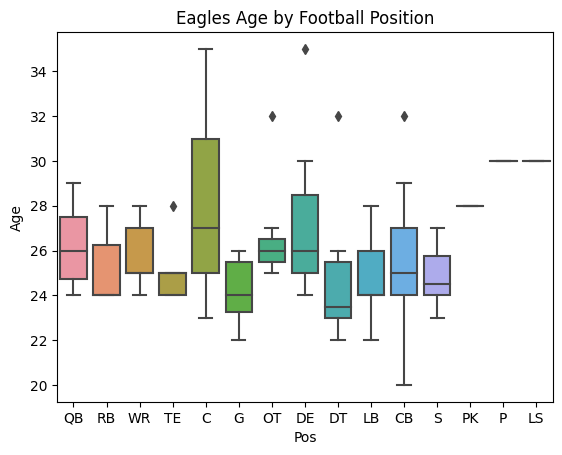

In [543]:
# creating visualizations #
sns.boxplot(x = 'Pos', y = 'Age', data = eagles_df).set(title = "Eagles Age by Football Position")

[Text(0.5, 1.0, 'Eagles Weight by Football Position')]

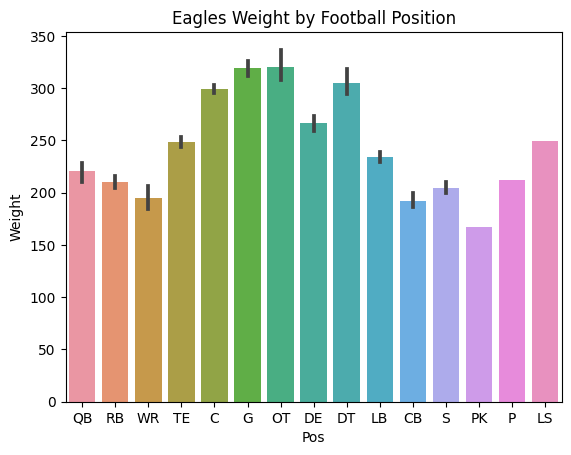

In [544]:
sns.barplot(x = 'Pos', y = 'Weight', data = eagles_df).set(title = "Eagles Weight by Football Position")